# 片浦
## 準備

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
path = os.getcwd()
print(path)

/home/access/work


import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
path = os.getcwd()
print(path)

In [2]:
df_con = pd.read_csv("./data/contents.csv",header=0,index_col=None)
df_com = pd.read_csv("./data/comments.csv",header=0,index_col=None)
df_com

,content_id,user_id,inserted_at,like_count,message
0,1016369,298364,2021-10-31 15:00:16,22176,アニメ化おめでとう！！！！！
1,1016369,219064,2021-10-31 15:00:30,1387,アニメ化おめでとう！！まじか？！
2,1016369,103248838,2021-10-31 15:00:35,13940,遂にアニメ化来た！おめでとう！！！！
3,1016369,35688635,2021-10-31 15:00:40,1,やっぱりアニメ化か！おめでとうございます🎊
4,1016369,1213862,2021-10-31 15:00:41,1,おめでとうアニメ化！アーニャ可愛いなぁ
...,...,...,...,...,...
101208,1026940,1848537,2022-03-31 09:27:27,0,キャラデザすごすぎぃ…ウルト○マンに出てくる怪獣みたいに洗練されてるじゃん…
101209,1025345,105935471,2022-03-31 09:47:30,0,雷(トニト)一閃は草
101210,1026940,812330,2022-03-31 10:18:28,0,ジジは何食べてそんなにデカくなったんだ
101211,1016995,105982740,2022-03-31 10:23:10,0,最高だわ…


## 対象とするコメントの抽出
コンテンツデータとコメントデータをマージ

In [3]:
df_con_reduced  = df_con[['work_id','content_id', 'work_name', 'content_name']]
df_com_con = df_com.merge(df_con_reduced, on=['content_id'])

草、笑、wが文末に使用されているコメントのインデックスを取得

In [40]:
regex = 'w(?:\\n|$)|笑(?:\\n|$)|草(?:\\n|$)'
targetMessageIdx = df_com_con['message'].str.contains(regex, regex=True)
targetData = df_com_con[targetMessageIdx]
#targetData

作品ごとの草、笑、wそれぞれのコメントがついている数

ダンダダン          31176
怪獣８号           31075
SPY×FAMILY     24804
左ききのエレン         6938
阿波連さんははかれない     3961
鴨乃橋ロンの禁断推理      3259
Name: work_name, dtype: int64

##### 草 #####
SPY×FAMILY     0.018586
ダンダダン          0.014819
左ききのエレン        0.004756
怪獣８号           0.008946
阿波連さんははかれない    0.023479
鴨乃橋ロンの禁断推理     0.006444
Name: work_name, dtype: float64

##### 笑　######
SPY×FAMILY     0.032575
ダンダダン          0.022710
左ききのエレン        0.014269
怪獣８号           0.010684
阿波連さんははかれない    0.015148
鴨乃橋ロンの禁断推理     0.018104
Name: work_name, dtype: float64

##### 芝 ######
SPY×FAMILY     0.080914
ダンダダン          0.054978
左ききのエレン        0.028106
怪獣８号           0.019244
阿波連さんははかれない    0.053774
鴨乃橋ロンの禁断推理     0.039890
Name: work_name, dtype: float64


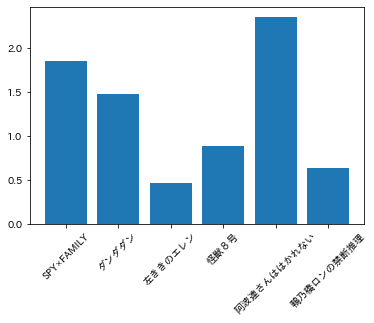

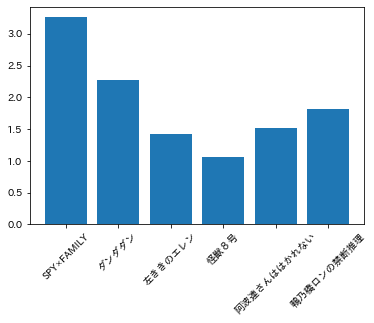

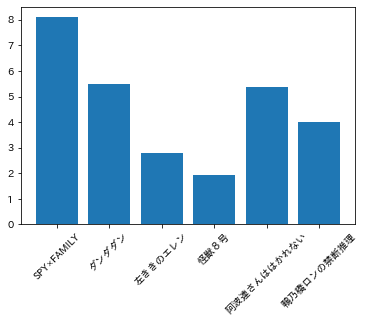

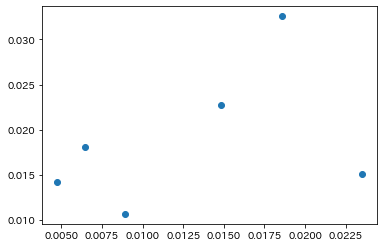

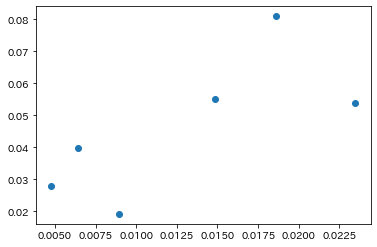

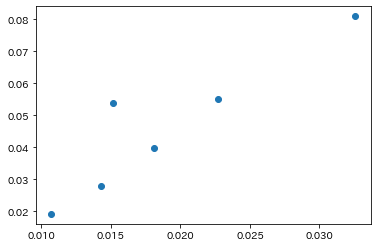

In [80]:
kusaRegex = '草(?:\\n|$)'
waraRegex = '笑(?:\\n|$)'
sibaRegex = 'w(?:\\n|$)'
kusaIdx = targetData['message'].str.contains(kusaRegex, regex=True)
waraIdx = targetData['message'].str.contains(waraRegex, regex=True)
sibaIdx = targetData['message'].str.contains(sibaRegex, regex=True)

content_name_kusa = targetData['work_name'][kusaIdx].value_counts()
content_name_wara = targetData['work_name'][waraIdx].value_counts()
content_name_siba = targetData['work_name'][sibaIdx].value_counts()

work_count = df_com_con['work_name'].value_counts()
print(work_count)
print("\n##### 草 #####")
print(content_name_kusa/work_count)
print("\n##### 笑　######")
print(content_name_wara/work_count)
print("\n##### 芝 ######")
print(content_name_siba/work_count)

label = ["SPY×FAMILY", "ダンダダン", "左ききのエレン", "怪獣８号", "阿波連さんははかれない", "鴨乃橋ロンの禁断推理"]
plt.bar([1,2,3,4,5,6], content_name_kusa/work_count * 100, tick_label=label)
plt.xticks(rotation=45)
plt.figure()
plt.bar([1,2,3,4,5,6], content_name_wara/work_count * 100, tick_label=label)
plt.xticks(rotation=45)
plt.figure()
plt.bar([1,2,3,4,5,6], content_name_siba/work_count * 100, tick_label=label)
plt.xticks(rotation=45)

plt.figure()
plt.scatter(content_name_kusa/work_count, content_name_wara/work_count)
plt.figure()
plt.scatter(content_name_kusa/work_count, content_name_siba/work_count)
plt.figure()
plt.scatter(content_name_wara/work_count, content_name_siba/work_count)

## ユーザの分類

- 草だけ使う
- 笑だけ使う
- 芝だけ使う
- 草＆笑を使う
- 草＆芝を使う
- 笑＆芝を使う
- 全部使う

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, '草'),
  Text(2, 0, '笑'),
  Text(3, 0, '芝'),
  Text(4, 0, '草＆笑'),
  Text(5, 0, '草＆芝'),
  Text(6, 0, '笑＆芝'),
  Text(7, 0, '草＆笑＆芝')])

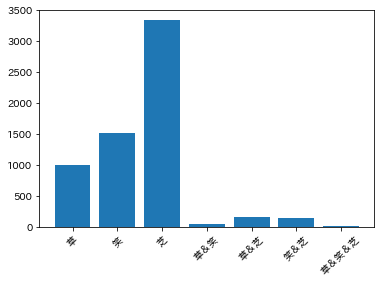

In [42]:
allUser = targetData[kusaIdx | waraIdx | sibaIdx]['user_id'].unique()
kusaUser = targetData[kusaIdx]['user_id'].unique()
waraUser = targetData[waraIdx]['user_id'].unique()
sibaUser = targetData[sibaIdx]['user_id'].unique()

kusaWaraSibaUser = list(set(kusaUser) & set(waraUser) & set(sibaUser))
kusaOnlyUser = list(set(kusaUser) - set(waraUser) - set(sibaUser))
waraOnlyUser = list(set(waraUser) - set(kusaUser) - set(sibaUser))
sibaOnlyUser = list(set(sibaUser) - set(waraUser) - set(kusaUser))
kusaWaraUser = list((set(kusaUser) & set(waraUser)) - set(kusaWaraSibaUser))
kusaSibaUser = list((set(kusaUser) & set(sibaUser)) - set(kusaWaraSibaUser))
waraSibaUser = list((set(waraUser) & set(sibaUser)) - set(kusaWaraSibaUser))

l = [len(kusaOnlyUser), \
     len(waraOnlyUser), \
     len(sibaOnlyUser), \
     len(kusaWaraUser), \
     len(kusaSibaUser), \
     len(waraSibaUser), \
     len(kusaWaraSibaUser)]
label = ["草", "笑", "芝", "草＆笑", "草＆芝", "笑＆芝", "草＆笑＆芝"]
plt.bar([1,2,3,4,5,6,7], l, tick_label=label)
plt.xticks(rotation=45)

草、笑、芝の平均いいね数

In [75]:
nonZeroIdx = targetData['like_count'] >= 0

print(targetData[kusaIdx & nonZeroIdx]['like_count'].mean())
print(targetData[waraIdx & nonZeroIdx]['like_count'].mean())
print(targetData[sibaIdx & nonZeroIdx]['like_count'].mean())
print()
print(sum(kusaIdx & nonZeroIdx))
print(sum(waraIdx & nonZeroIdx))
print(sum(sibaIdx & nonZeroIdx))

126.27596439169139
70.7134559535334
59.38027589046737

1348
2066
4857


## いいね

In [104]:
thousandIdx = df_com_con['like_count'] < 1000
print(df_com_con[thousandIdx]['inserted_at'])
for date in df_com_con[thousandIdx]['inserted_at']:
    print(date[11:13])
    pass

3         2021-10-31 15:00:40
4         2021-10-31 15:00:41
5         2021-10-31 15:00:44
6         2021-10-31 15:00:44
7         2021-10-31 15:00:48
                 ...         
101208    2022-03-31 08:50:27
101209    2022-03-31 08:55:59
101210    2022-03-31 09:27:27
101211    2022-03-31 10:18:28
101212    2022-03-31 10:30:15
Name: inserted_at, Length: 100339, dtype: object
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
